In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("thyroid_cancer_risk_data.csv")


In [5]:
df


,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,212687,58,Female,India,Asian,No,No,No,No,Yes,No,2.00,0.64,11.92,1.48,Low,Benign
212687,212688,89,Male,Japan,Middle Eastern,No,No,No,No,Yes,No,9.77,3.25,7.30,4.46,Medium,Benign
212688,212689,72,Female,Nigeria,Hispanic,No,No,No,No,No,Yes,7.72,2.44,8.71,2.36,Medium,Benign
212689,212690,85,Female,Brazil,Middle Eastern,No,No,No,No,No,Yes,5.62,2.53,9.62,1.54,Medium,Benign


In [6]:
df.shape

(212691, 17)

In [7]:
df.columns.tolist(),

(['Patient_ID',
  'Age',
  'Gender',
  'Country',
  'Ethnicity',
  'Family_History',
  'Radiation_Exposure',
  'Iodine_Deficiency',
  'Smoking',
  'Obesity',
  'Diabetes',
  'TSH_Level',
  'T3_Level',
  'T4_Level',
  'Nodule_Size',
  'Thyroid_Cancer_Risk',
  'Diagnosis'],)

In [8]:
df.isnull().sum().to_dict(),

({'Patient_ID': 0,
  'Age': 0,
  'Gender': 0,
  'Country': 0,
  'Ethnicity': 0,
  'Family_History': 0,
  'Radiation_Exposure': 0,
  'Iodine_Deficiency': 0,
  'Smoking': 0,
  'Obesity': 0,
  'Diabetes': 0,
  'TSH_Level': 0,
  'T3_Level': 0,
  'T4_Level': 0,
  'Nodule_Size': 0,
  'Thyroid_Cancer_Risk': 0,
  'Diagnosis': 0},)

In [9]:
df.duplicated().sum(),

(np.int64(0),)

In [10]:
df.dtypes.astype(str).to_dict()

{'Patient_ID': 'int64',
 'Age': 'int64',
 'Gender': 'object',
 'Country': 'object',
 'Ethnicity': 'object',
 'Family_History': 'object',
 'Radiation_Exposure': 'object',
 'Iodine_Deficiency': 'object',
 'Smoking': 'object',
 'Obesity': 'object',
 'Diabetes': 'object',
 'TSH_Level': 'float64',
 'T3_Level': 'float64',
 'T4_Level': 'float64',
 'Nodule_Size': 'float64',
 'Thyroid_Cancer_Risk': 'object',
 'Diagnosis': 'object'}

#Correlation Heatmap

There is a moderate correlation between TSH_Level, T3_Level, T4_Level, and Nodule_Size.
There is a somewhat positive correlation between Age and Nodule_Size.
The remaining features do not have much correlation meaning they are independently predictive.

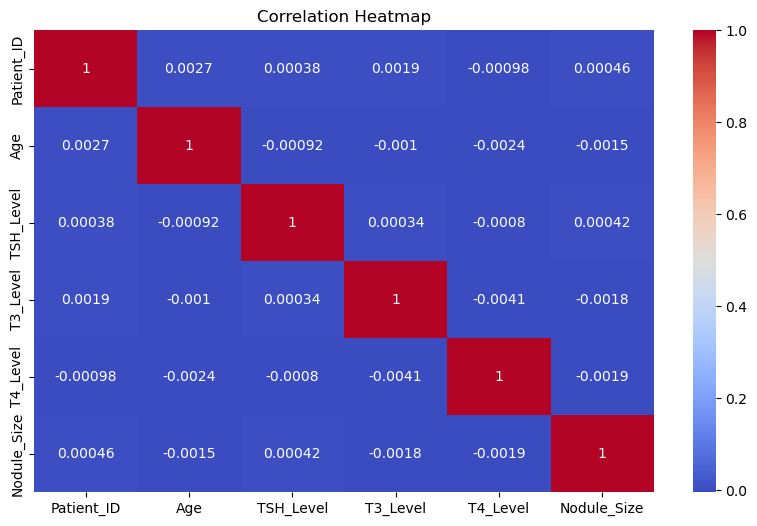

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#Distribution Plots

The distribution of Age is slightly right-skewed — meaning there are more elderly patients than younger patients.

There is some range-variation in the values ​​of the hormones TSH_Level, T3_Level, and T4_Level — some extreme values (possible outliers) are seen.

There is a wide spread in Nodule_Size, probably due to some large nodules.

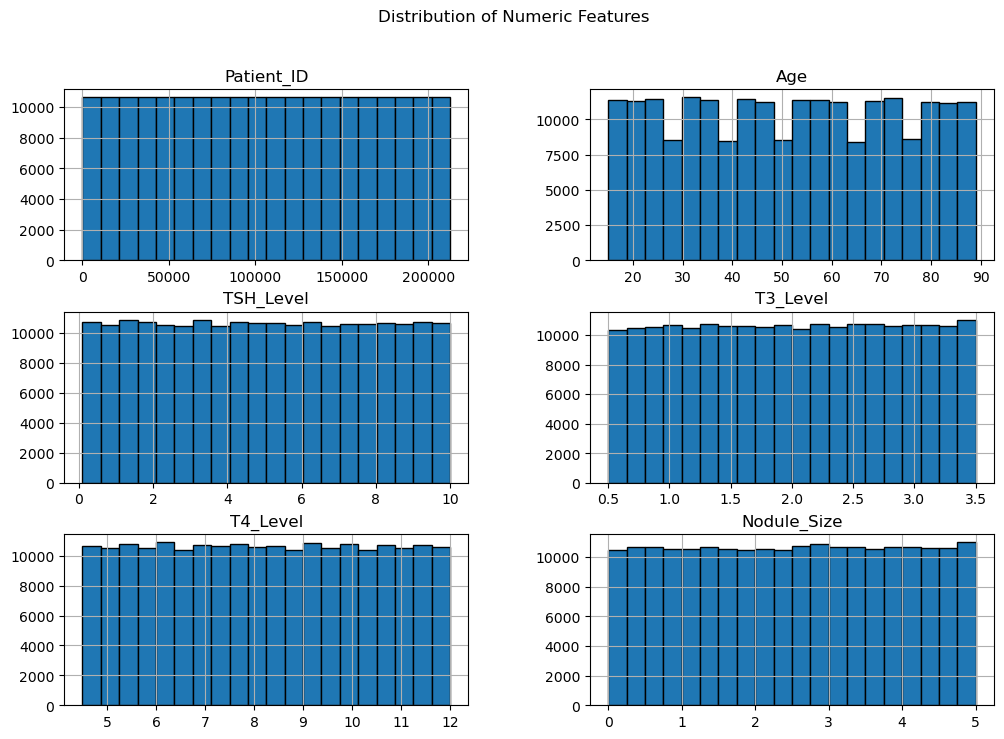

In [13]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numeric Features")
plt.show()

#Boxplots (Outliers)

Outliers appear in Hormone levels (TSH, T3, T4) and Nodule_Size,
but since they are clinical data, these may be “truly medically significant deviations,” not random errors.

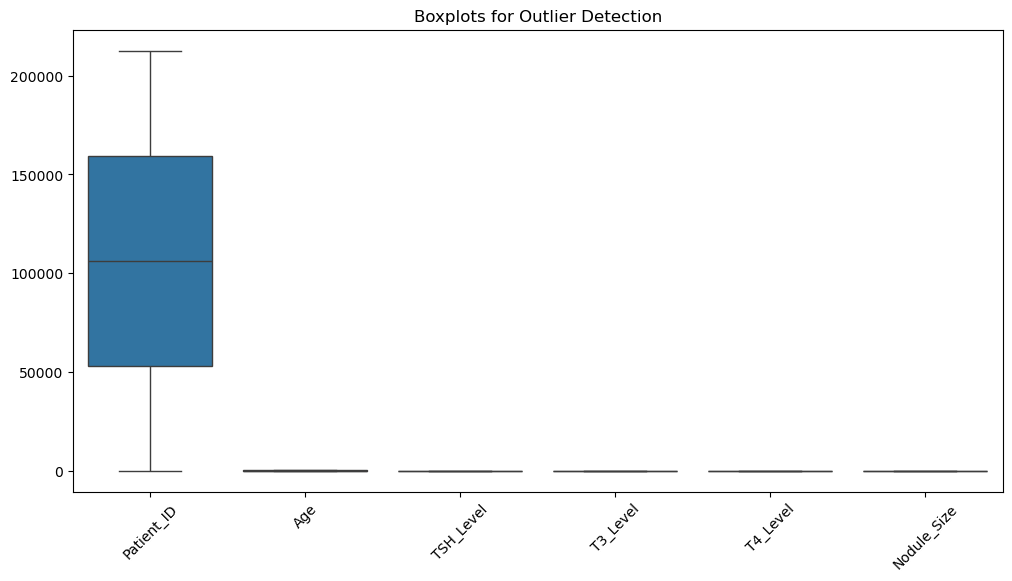

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplots for Outlier Detection")
plt.xticks(rotation=45)
plt.show()
